<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad3/Exploracion_Dataset_Frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 3

**Exploracion del Dataset Frutas**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

## **Fruit dataset**


- Es uno de los conjuntos de datos más conocidos en el mundo del aprendizaje automático y la ciencia de datos.

- Consta de 59 registros con 4 tipos de frutas



In [ ]:
# Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
frutas = pd.read_csv("frutas.csv")
frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


## **Explorar variables mediante la Visualización**

- **Identificar patrones y tendencias**: visualizar datos puede ayudarle a detectar tendencias y patrones que pueden no ser evidentes en los datos sin procesar.
- **Comparación de datos**: las visualizaciones pueden ayudarle a comparar diferentes conjuntos de datos o variables y ver cómo se relacionan entre sí.
- **Identificación de valores atípicos**: las visualizaciones pueden ayudarle a identificar puntos de datos inusuales o inesperados, lo que puede resultar útil para identificar errores o anomalías en los datos

In [ ]:
frutas['fruit_name'].value_counts()

,count
fruit_name,
apple,19
orange,19
lemon,16
mandarin,5


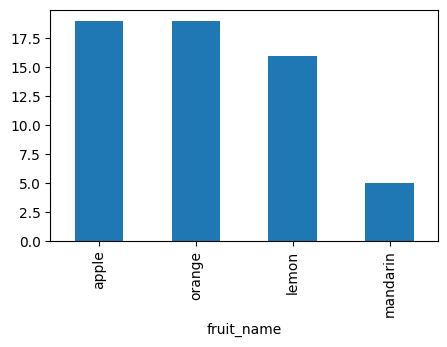

In [ ]:
# Contabilizar registros en el dataset por cada tipo de fruta
plt.figure(figsize=(5,3))
frutas['fruit_name'].value_counts().plot(kind='bar')
plt.show()

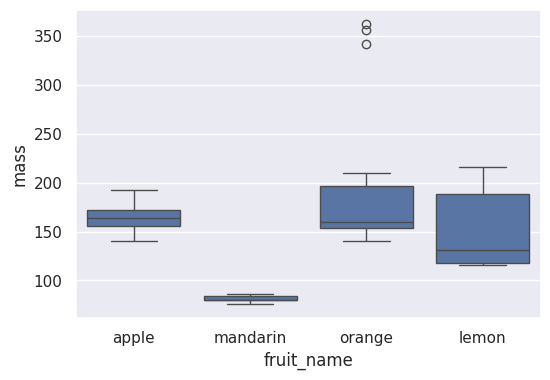

In [ ]:
# trazamos un diagrama de caja para verificar como está la distribución
# de la variable masa

sns.set_theme(rc={'figure.figsize':(6, 4)})
sns.boxplot(x='fruit_name', y='mass', data = frutas)
plt.show()

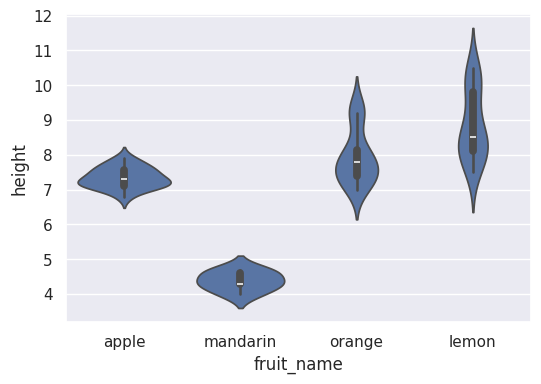

In [ ]:
# trazamos un diagrama de violin para verificar como está la distribución
# de la variable altura

sns.violinplot(x='fruit_name', y='height', data = frutas)
plt.show()

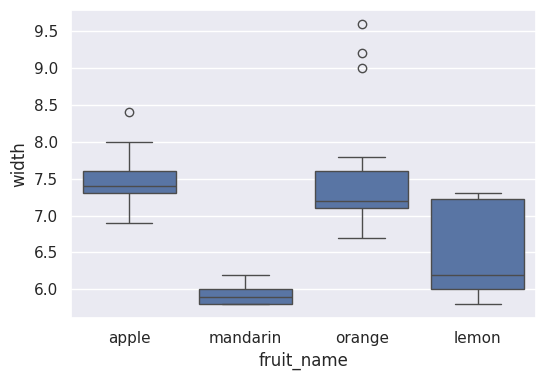

In [ ]:
# trazamos un diagrama de caja para verificar como está la distribución
# de la variable ancho

sns.boxplot(x='fruit_name', y='width', data = frutas)
plt.show()

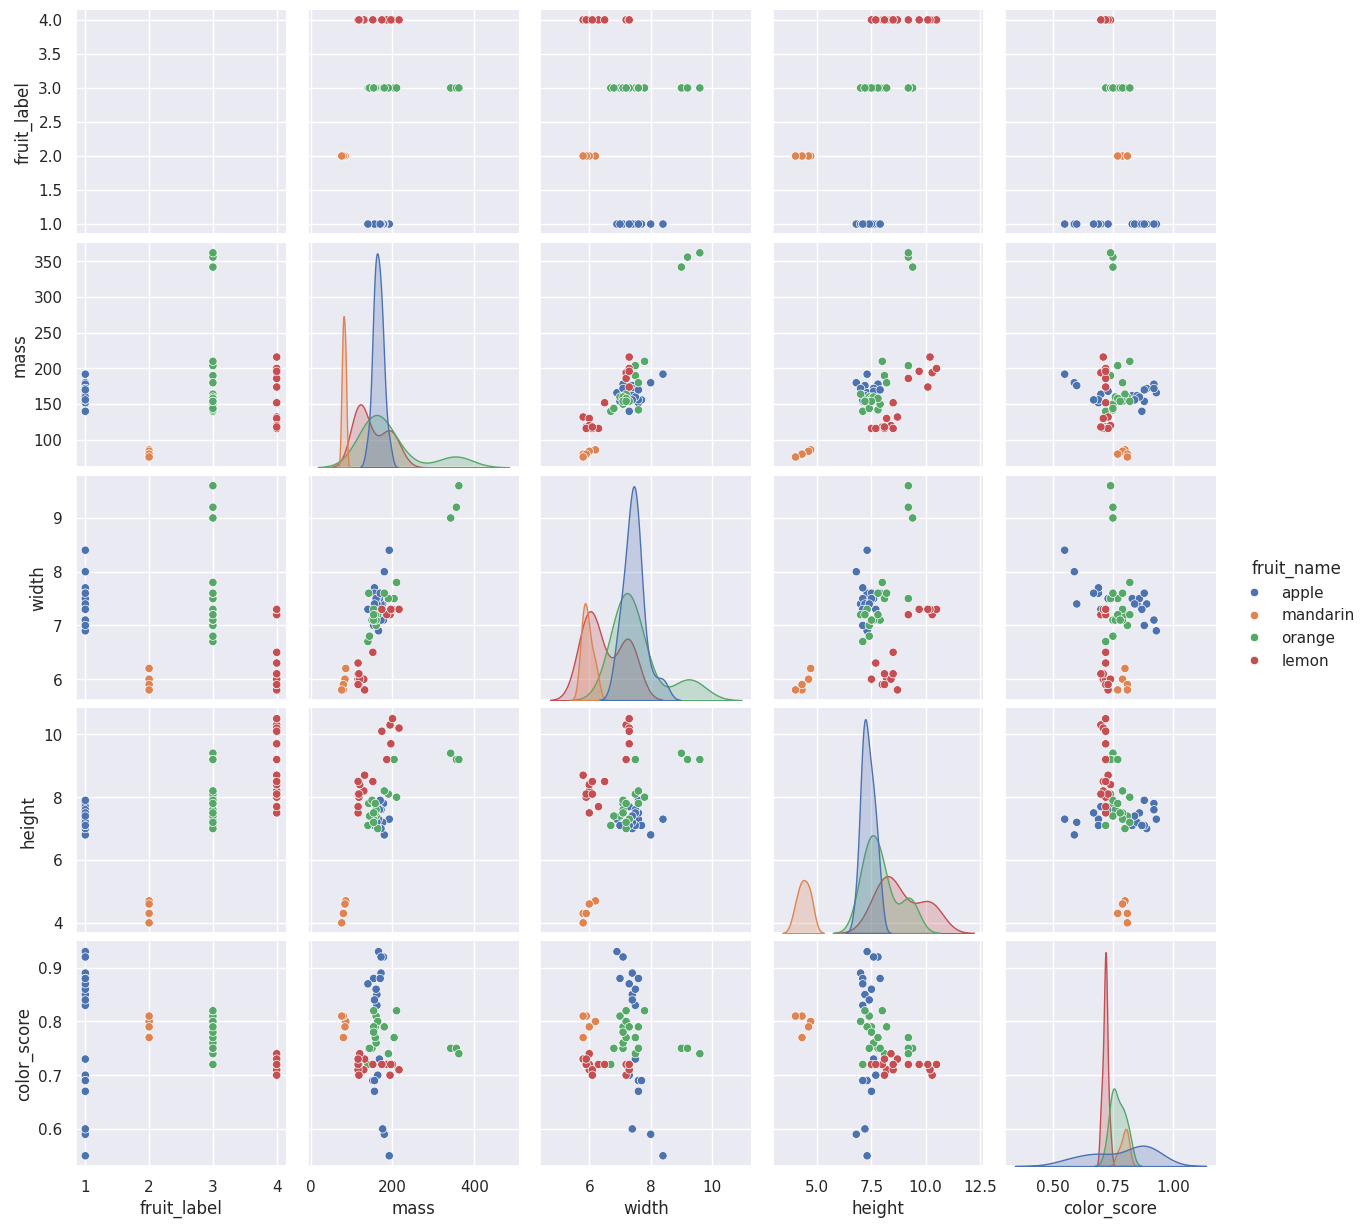

In [ ]:
sns.pairplot(frutas, hue="fruit_name")

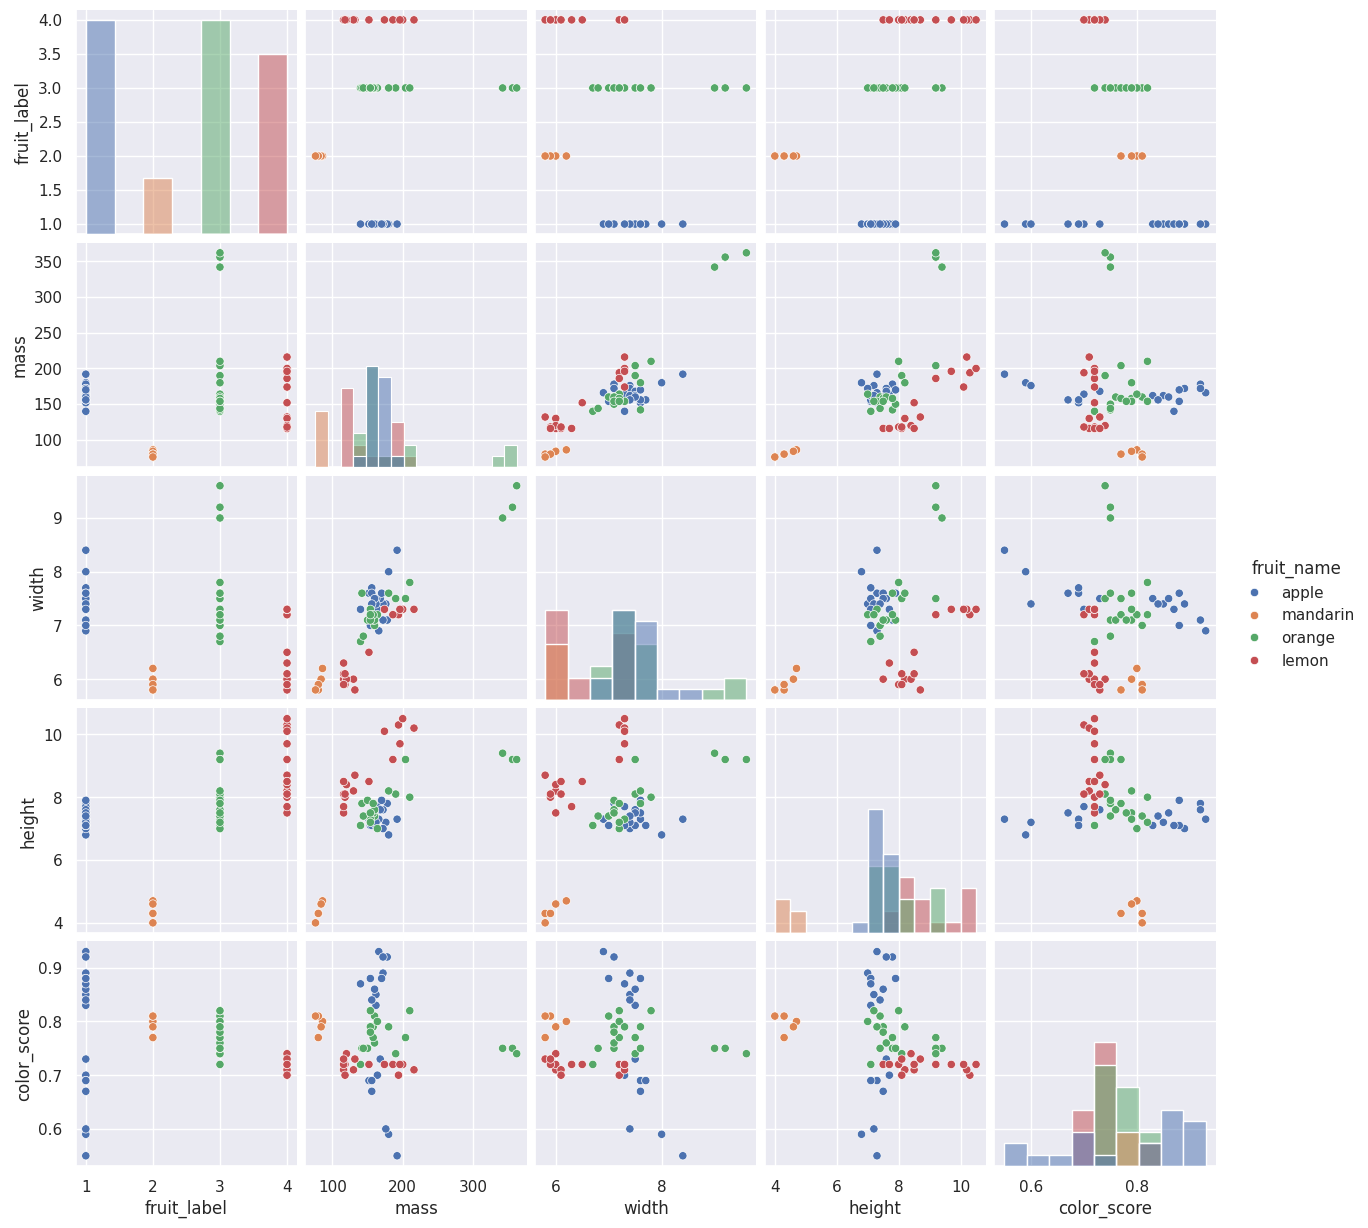

In [ ]:
# Cambiando el grafico de la diagonal a un histograma

sns.pairplot(frutas, hue="fruit_name", diag_kind="hist")

/tmp/ipython-input-275327528.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (frutas [ 'width' ] )


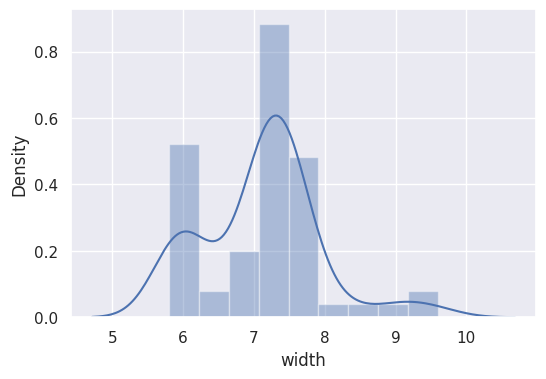

In [ ]:
# Trazar el diagrama de distribución

sns.distplot (frutas [ 'width' ] )
plt.show ()

<Axes: xlabel='height', ylabel='width'>

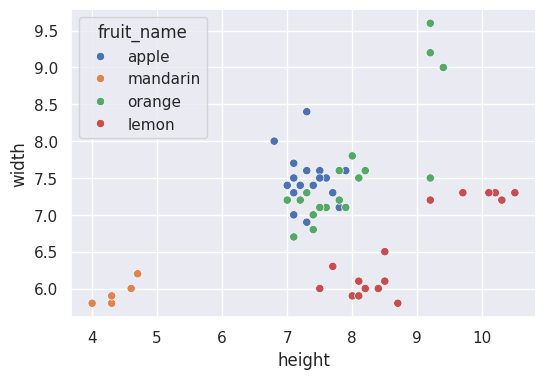

In [ ]:
sns.scatterplot(data=frutas, x="height", y="width", hue="fruit_name")

### **Gráfico 3D**

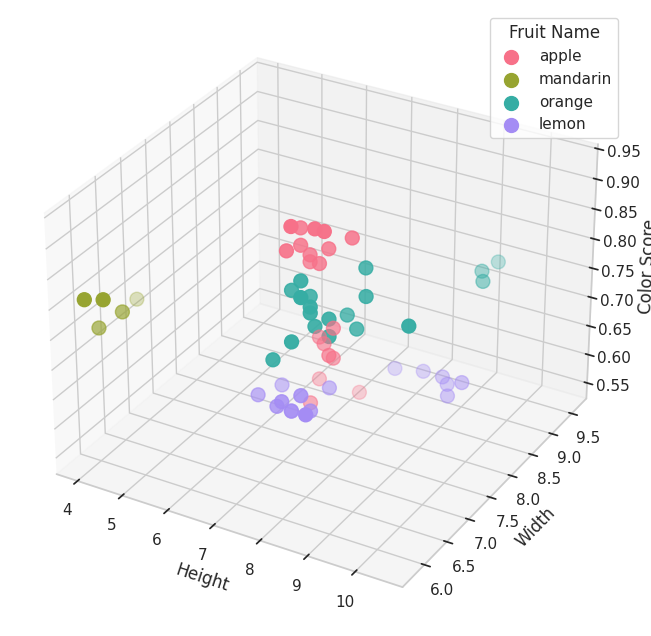

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar un estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores según las clases de frutas
hue_order = frutas["fruit_name"].unique()  # Obtener las categorías únicas
palette = sns.color_palette("husl", len(hue_order))  # Generar colores
color_dict = dict(zip(hue_order, palette))  # Mapear clases a colores

# Graficar cada clase por separado
for fruit, color in color_dict.items():
    subset = frutas[frutas["fruit_name"] == fruit]
    ax.scatter(
        subset["height"],
        subset["width"],
        subset["color_score"],
        color=color,
        label=fruit,
        s=100  # Tamaño de los puntos
    )
# Etiquetas de los ejes
ax.set_xlabel("Height")
ax.set_ylabel("Width")
ax.set_zlabel("Color Score")
# Agregar la leyenda
ax.legend(title="Fruit Name")
# Mostrar el gráfico
plt.show()

## **Graficos dinamicos usando plotly**

In [ ]:
import plotly.express as px

# Conteo de valores por tipo de fruta
fig1 = px.histogram(frutas, x="fruit_name", title="Distribución de frutas por tipo",
                    color="fruit_name", text_auto=True)
fig1.update_layout(xaxis_title="Tipo de fruta", yaxis_title="Cantidad")
fig1.update_layout(width=600, height=400)
fig1.show()

In [ ]:
# Diagrama de dispersión interactivo (peso vs dulzura)
fig2 = px.scatter(frutas, x="mass", y="width",
                  color="fruit_name",
                  hover_data=["mass", "width"],
                  title="Relación entre masa y ancho de las frutas")
fig2.update_layout(width=600, height=400)
fig2.show()

In [ ]:
# Heatmap de correlaciones
fig5 = px.imshow(frutas.corr(numeric_only=True),
                 text_auto=True,
                 color_continuous_scale="RdBu_r",
                 title="Mapa de correlaciones entre variables numéricas")
fig5.show()

In [ ]:
# Boxplot para analizar la distribución del peso por tipo de fruta
fig3 = px.box(frutas, x="width", y="mass", color="fruit_name",
              title="Distribución del ancho por tipo de fruta")
fig3.update_layout(width=600, height=400)
fig3.show()

In [ ]:
frutas[["height", "width", "mass", "color_score"]].corr()

,height,width,mass,color_score
height,1.000000,0.396848,0.609571,-0.247047
width,0.396848,1.000000,0.877687,-0.076576
mass,0.609571,0.877687,1.000000,-0.079794
color_score,-0.247047,-0.076576,-0.079794,1.000000
